### Here are some of the problems you could run into:

* You may be faced with the problem of gradients growing ever smaller
or larger, when flowing backward through the DNN during training.
Both of these problems make lower layers very hard to train.

* You might not have enough training data for such a large network, or it
might be too costly to label.
* Training may be extremely slow.
* A model with millions of parameters would severely risk overfitting
the training set, especially if there are not enough training instances or
if they are too noisy.

### The Vanishing/Exploding Gradients Problems
1. Unfortunately, gradients often get smaller and smaller as the algorithm
progresses down to the lower layers. As a result, the gradient descent
update leaves the lower layers’ connection weights virtually unchanged,
and training never converges to a good solution. This is called the vanishing
gradients problem.


### exploding gradients problem.
1. In some cases, the opposite can happen: the gradients
can grow bigger and bigger until layers get insanely large weight updates
and the algorithm diverges.

### Problem for Vanishing or exploding gradients
1. you can see
that when inputs become large (negative or positive), the function saturates
at 0 or 1, with a derivative extremely close to 0 (i.e., the curve is flat at both
extremes). Thus, when backpropagation kicks in it has virtually no gradient
to propagate back through the network, and what little gradient exists keeps
getting diluted as backpropagation progresses down through the top layers,
so there is really nothing left for the lower layers

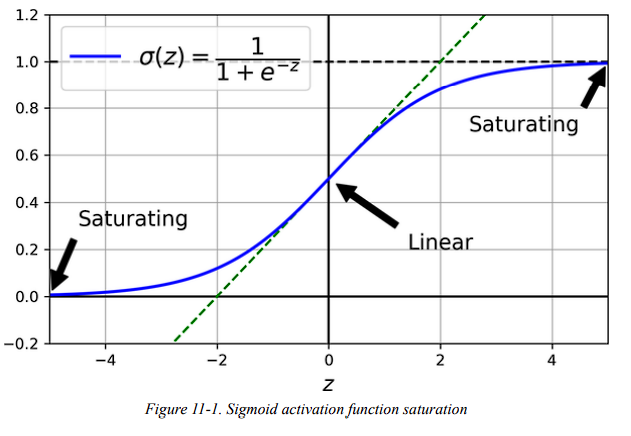


### Gorot and He Initialization: 

1. authors argue that we need the
variance of the outputs of each layer to be equal to the variance of its
inputs, and we need the gradients to have equal variance before and after
flowing through a layer in the reverse direction

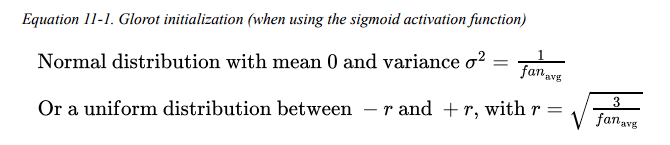

2.  Tricks of the Trade (Springer).
LeCun initialization is equivalent to Glorot initialization when fan_in =
fan_out.


### Initialization parameters for each type of activation functions:

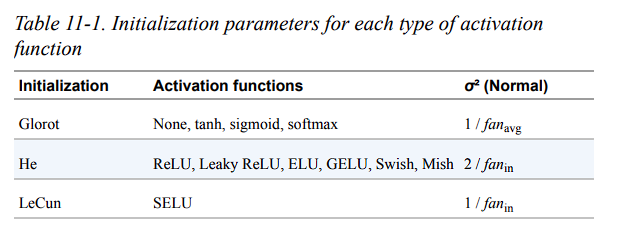




In [1]:
""" Keras uses Glorot initialization with a uniform distribution.
When you create a layer, you can switch to He initialization by setting
kernel_initializer="he_uniform" or
kernel_initializer="he_normal" like this:"""

import tensorflow as tf
dense = tf.keras.layers.Dense(50, activation="relu",
kernel_initializer="he_normal")

In [2]:
""" if you want
He initialization with a uniform distribution and based on fan (rather than
fan ), you can use the following code:"""

he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg",
distribution="uniform")

dense = tf.keras.layers.Dense(50, activation="sigmoid",
kernel_initializer=he_avg_init)

### Better Activation Functions

1.  dying ReLUs problem :
during training, some neurons
effectively “die”, meaning they stop outputting anything other than 0. In
some cases, you may find that half of your network’s neurons are dead,
especially if you used a large learning rate. A neuron dies when its weights
get tweaked in such a way that the input of the ReLU function (i.e., the
weighted sum of the neuron’s inputs plus its bias term) is negative for all
instances in the training set. When this happens, it just keeps outputting
zeros, and gradient descent does not affect it anymore because the gradient
of the ReLU function is zero when its input is negative.

2. Leaky ReLU Solution to dying Relu:

* LeakyReLU (z) =
max(αz, z) (see Figure 11-2). The hyperparameter α defines how much the
function “leaks”: it is the slope of the function for z < 0. Having a slope for
z < 0 ensures that leaky ReLUs never die; they can go into a long coma, but
they have a chance to eventually wake up.

* In fact, setting α = 0.2 (a huge leak) seemed to
result in better performance than α = 0.01 (a small leak). The paper also
evaluated the randomized leaky ReLU (RReLU), where α is picked
randomly in a given range during training and is fixed to an average value
during testing. RReLU also performed fairly well and seemed to act as a
regularizer, reducing the risk of overfitting the training set.

* parametric leaky ReLU (PReLU), where α is authorized
to be learned during training: instead of being a hyperparameter, it becomes
a parameter that can be modified by backpropagation like any other
parameter. PReLU was reported to strongly outperform ReLU on large
image datasets, but on smaller datasets it runs the risk of overfitting the
training set..

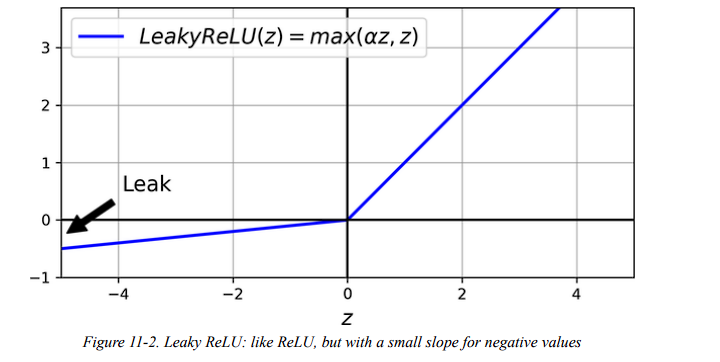




In [3]:
"""Just like for other ReLU variants, you should use He initialization
with these. For example:"""

leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2) # defaults to alpha=0.3
dense = tf.keras.layers.Dense(50, activation=leaky_relu,
kernel_initializer="he_normal")

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
"""If you prefer, you can also use LeakyReLU as a separate layer in your model;
it makes no difference for training and predictions:

model = tf.keras.models.Sequential([
[...] # more layers
tf.keras.layers.Dense(50, kernel_initializer="he_normal"), # no
activation
tf.keras.layers.LeakyReLU(alpha=0.2), # activation as a separate layer
[...] # more layers
])

"""

### Drawbacks of relu , leaky relu and Prelu:
1. ReLU, leaky ReLU, and PReLU all suffer from the fact that they are not
smooth functions: their derivatives abruptly change (at z = 0). As we saw in
Chapter 4 when we discussed lasso, this sort of discontinuity can make
gradient descent bounce around the optimum, and slow down convergence.

### Smooth Variants of relu:

1. ELU(exponential linear unit):

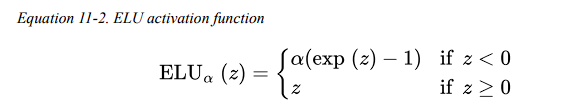


* few major differences::
    * It takes on negative values when z < 0, which allows the unit to have
    an average output closer to 0 and helps alleviate the vanishing
    gradients problem. The hyperparameter α defines the opposite of the
    value that the ELU function approaches when z is a large negative
    number. It is usually set to 1, but you can tweak it like any other
    hyperparameter.

    * It has a nonzero gradient for z < 0, which avoids the dead neurons
    problem.

    * If α is equal to 1 then the function is smooth everywhere, including
    around z = 0, which helps speed up gradient descent since it does not
    bounce as much to the left and right of z = 0.

* drawbacks:
    * it is slower to compute than
the ReLU function and its variants (due to the use of the exponential
function). Its faster convergence rate during training may compensate for
that slow computation, but still, at test time an ELU network will be a bit
slower than a ReLU network.

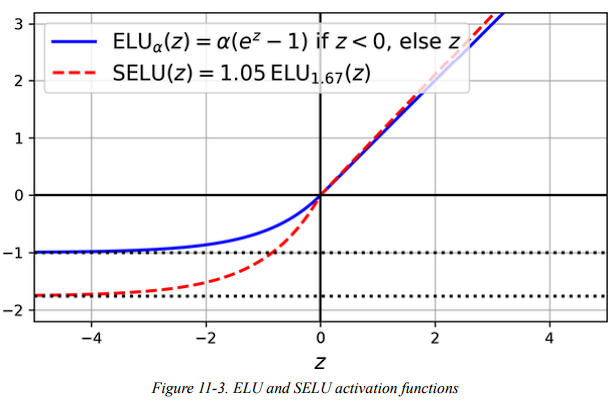


2. SELU (scaled ELU):
* The authors showed that if you build a neural network composed
exclusively of a stack of dense layers (i.e., an MLP), and if all hidden layers
use the SELU activation function, then the network will self-normalize: the
output of each layer will tend to preserve a mean of 0 and a standard
deviation of 1 during training, which solves the vanishing/exploding
gradients problem.

* There are, however, a few
    conditions for self-normalization to happen (see the paper for the
    mathematical justification):

    * The input features must be standardized: mean 0 and standard
    deviation 1.

    * Every hidden layer’s weights must be initialized using LeCun normal
    initialization. In Keras, this means setting
    kernel_initializer="lecun_normal".

    * The self-normalizing property is only guaranteed with plain MLPs. If
    you try to use SELU in other architectures, like recurrent networks
    (see Chapter 15) or networks with skip connections (i.e., connections
    that skip layers, such as in Wide & Deep nets), it will probably not
    outperform ELU.

    * You cannot use regularization techniques like ℓ or ℓ regularization,
    max-norm, batch-norm, or regular dropout (these are discussed later in
    this chapter).

In [ ]:
"""Using ELU with Keras is as easy as setting activation="elu", and like
with other ReLU variants, you should use He initialization"""

In [17]:
"""To
use selu it with Keras, just set activation="selu"."""
import tensorflow as tf

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

for layer in range(100):
    model.add(tf.keras.layers.Dense(100,activation="selu",
                                    kernel_initializer="lecun_normal"))
    
model.add(tf.keras.layers.Dense(10,activation="softmax"))


C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [19]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [22]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.4110 - loss: 1.5668 - val_accuracy: 0.7404 - val_loss: 0.7408
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.7356 - loss: 0.7374 - val_accuracy: 0.7712 - val_loss: 0.6385
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.7748 - loss: 0.6441 - val_accuracy: 0.7954 - val_loss: 0.5887
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8022 - loss: 0.5778 - val_accuracy: 0.8252 - val_loss: 0.5082
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8215 - loss: 0.5171 - val_accuracy: 0.8138 - val_loss: 0.5354


The network managed to learn, despite how deep it is. Now look at what happens if we try to use the ReLU activation function instead:

In [23]:
tf.random.set_seed(42)

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [26]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5060s 3s/step - accuracy: 0.1865 - loss: 2.0617 - val_accuracy: 0.3558 - val_loss: 1.7073
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.3553 - loss: 1.6235 - val_accuracy: 0.5636 - val_loss: 1.2033
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.5306 - loss: 1.1378 - val_accuracy: 0.5732 - val_loss: 1.0409
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.6463 - loss: 0.8984 - val_accuracy: 0.7136 - val_loss: 0.7705
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.6794 - loss: 0.8205 - val_accuracy: 0.5588 - val_loss: 1.0438


Not great at all, we suffered from the vanishing/exploding gradients problem.

### Better options that SELU:
1. GELU:

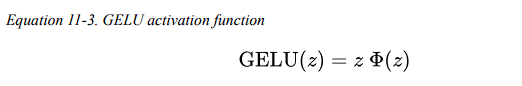

where Φ is the
standard Gaussian cumulative distribution function (CDF): Φ(z)
corresponds to the probability that a value sampled randomly from a normal
distribution of mean 0 and variance 1 is lower than z.

* : it approaches 0
    when its input z is very negative, and it approaches z when z is very
    positive.

*  In practice, it often outperforms every other        activation
    function discussed so far. However, it is a bit more computationally
    intensive, and the performance boost it provides is not always sufficient to
    justify the extra cost.

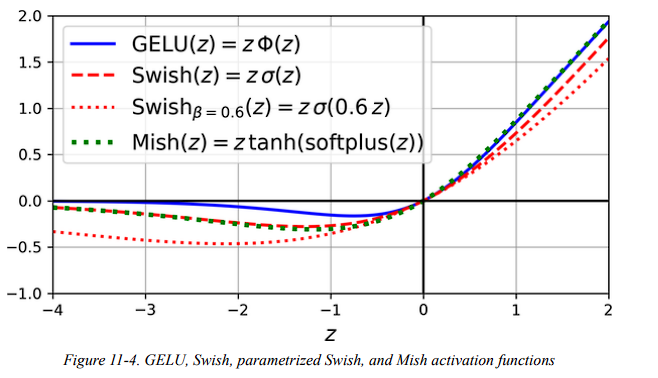

2. Swish:

* The generalized
Swish function is Swish (z) = zσ(βz), so GELU is approximately equal to
the generalized Swish function using β = 1.702. You can tune β like any
other hyperparameter. Alternatively, it’s also possible to make β trainable
and let gradient descent optimize it: much like PReLU, this can make your
model more powerful, but it also runs the risk of overfitting the data.

3. Mish:
* mish(z) = ztanh(softplus(z)),
where softplus(z) = log(1 + exp(z)). Just like GELU and Swish, it is a
smooth, nonconvex, and nonmonotonic variant of ReLU, and once again
the author ran many experiments and found that Mish generally
outperformed other activation functions—even Swish and GELU, by a tiny
margin. Figure 11-4 shows GELU, Swish (both with the default β = 1 and
with β = 0.6), and lastly Mish. As you can see, Mish overlaps almost
perfectly with Swish when z is negative, and almost perfectly with GELU
when z is positive.

> TIP:
So, which activation function should you use for the hidden layers of your deep neural
networks? ReLU remains a good default for simple tasks: it’s often just as good as the
more sophisticated activation functions, plus it’s very fast to compute, and many
libraries and hardware accelerators provide ReLU-specific optimizations. However,
Swish is probably a better default for more complex tasks, and you can even try
parametrized Swish with a learnable β parameter for the most complex tasks. Mish may
give you slightly better results, but it requires a bit more compute. If you care a lot about
runtime latency, then you may prefer leaky ReLU, or parametrized leaky ReLU for more
complex tasks. For deep MLPs, give SELU a try, but make sure to respect the
constraints listed earlier. If you have spare time and computing power, you can use
cross-validation to evaluate other activation functions as well.




In [ ]:
"""Keras supports GELU and Swish out of the box; just use
activation="gelu" or activation="swish". However, it does not
support Mish or the generalized Swish activation function yet (but see
Chapter 12 to see how to implement your own activation functions and
layers).
"""

### Batch Normalization

1. The
technique consists of adding an operation in the model just before or after
the activation function of each hidden layer. This operation simply zerocenters and normalizes each input, then scales and shifts the result using
two new parameter vectors per layer: one for scaling, the other for shifting.

2. In many cases, if you add a BN layer as
the very first layer of your neural network, you do not need to standardize
your training set.

3. In order to zero-center and normalize the inputs, the algorithm needs to
estimate each input’s mean and standard deviation. It does so by evaluating
the mean and standard deviation of the input over the current mini-batch
(hence the name “batch normalization”).

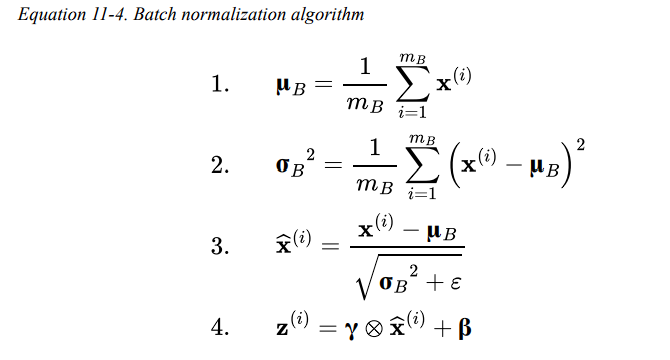

4. In this algorithm:

* μ_B is the vector of input means, evaluated over the whole mini-batch B
(it contains one mean per input).

* m_B is the number of instances in the mini-batch.

* σ_B is the vector of input standard deviations, also evaluated over the
whole mini-batch (it contains one standard deviation per input).

* ^x^(i) is the vector of zero-centered and normalized inputs for instance i.

* ε is a tiny number that avoids division by zero and ensures the
gradients don’t grow too large (typically 10 ). This is called a
smoothing term.

* γ is the output scale parameter vector for the layer (it contains one
scale parameter per input).

* ⊗ represents element-wise multiplication (each input is multiplied by
its corresponding output scale parameter).

* β is the output shift (offset) parameter vector for the layer (it contains
one offset parameter per input). Each input is offset by its
corresponding shift parameter.

* z^(i) is the output of the BN operation. It is a rescaled and shifted
version of the inputs

5. , batch normalization acts like a
regularizer, reducing the need for other regularization techniques.

6. Moreover, there is a runtime penalty: the neural network
makes slower predictions due to the extra computations required at each
layer. it’s often possible to fuse the BN layer with the previous layer after training, thereby avoiding the runtime penalty.

### Implementing BN with keras:

In [27]:
# extra code - clear the name counters and set the random seed
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [28]:
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(300, activation="relu",
kernel_initializer="he_normal"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(100, activation="relu",
kernel_initializer="he_normal"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(10, activation="softmax")
])


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

7.  each BN layer adds four parameters per input: γ, β, μ, and
σ (for example, the first BN layer adds 3,136 parameters, which is 4 × 784).
The last two parameters, μ and σ, are the moving averages; they are not
affected by backpropagation, so Keras calls them “non-trainable” (if you
count the total number of BN parameters, 3,136 + 1,200 + 400, and divide
by 2, you get 2,368, which is the total number of non-trainable parameters
in this model).


In [7]:
"""Let’s look at the parameters of the first BN layer. Two are trainable (by
backpropagation), and two are not:"""

[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [30]:
# extra code – just show that the model works! 😊
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7571 - loss: 0.7254 - val_accuracy: 0.8490 - val_loss: 0.4006
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8557 - loss: 0.4091 - val_accuracy: 0.8650 - val_loss: 0.3655


8. To add the BN layers before the activation function: 

* you must
remove the activation functions from the hidden layers and add them as
separate layers after the BN layers.

* since a batch normalization
layer includes one offset parameter per input, you can remove the bias term
from the previous layer by passing use_bias=False when creating it.

* you can usually drop the first BN layer to avoid sandwiching the
first hidden layer between two BN layers.


In [8]:
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dense(300, kernel_initializer="he_normal",
use_bias=False),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dense(100, kernel_initializer="he_normal",
use_bias=False),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dense(10, activation="softmax")
])

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9. momentum hyperparameter is used by the
BatchNormalization layer when it updates the exponential moving
averages; given a new value v (i.e., a new vector of input means or standard
deviations computed over the current batch), the layer updates the running
average vˆ using the following equation:
vˆ ← vˆ × momentum + v × (1 − momentum).
A good momentum value is typically close to 1; for example, 0.9, 0.99, or
0.999. You want more 9s for larger datasets and for smaller mini-batches.

10. Another important hyperparameter is axis: it determines which axis should
be normalized. It defaults to –1, meaning that by default it will normalize
the last axis (using the means and standard deviations computed across the
other axes). 

* When the input batch is 2D (i.e., the batch shape is [batch size,
features]), this means that each input feature will be normalized based on
the mean and standard deviation computed across all the instances in the
batch. For example, the first BN layer in the previous code example will
independently normalize (and rescale and shift) each of the 784 input
features. 

* If we move the first BN layer before the Flatten layer, then the
input batches will be 3D, with shape [batch size, height, width]; therefore,
the BN layer will compute 28 means and 28 standard deviations (1 per
column of pixels, computed across all instances in the batch and across all
rows in the column), and it will normalize all pixels in a given column
using the same mean and standard deviation. There will also be just 28
scale parameters and 28 shift parameters. 

* If instead you still want to treat
each of the 784 pixels independently, then you should set axis=[1, 2].

### Gradient Clipping:

1. Another technique to mitigate the exploding gradients problem is to clip the
gradients during backpropagation so that they never exceed some threshold.


In [31]:
"""In Keras, implementing gradient clipping is just a matter of setting the
clipvalue or clipnorm argument when creating an optimizer, like this

This optimizer will clip every component of the gradient vector to a value
between –1.0 and 1.0

"""
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)


In [32]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

2. The threshold is a hyperparameter you can tune. Note that it
may change the orientation of the gradient vector.
If you want to ensure that gradient clipping does not
change the direction of the gradient vector, you should clip by norm by
setting clipnorm instead of clipvalue. This will clip the whole gradient if
its ℓ norm is greater than the threshold you picked.

### Reusing Pretrained Layers:

1. If you find such as neural network, then you can
generally reuse most of its layers, except for the top ones. This technique is
called transfer learning. It will not only speed up training considerably, but
also requires significantly less training data.

>NOTE:
If the input pictures for your new task don’t have the same size as the ones used in the
original task, you will usually have to add a preprocessing step to resize them to the size
expected by the original model. More generally, transfer learning will work best when
the inputs have similar low-level features.
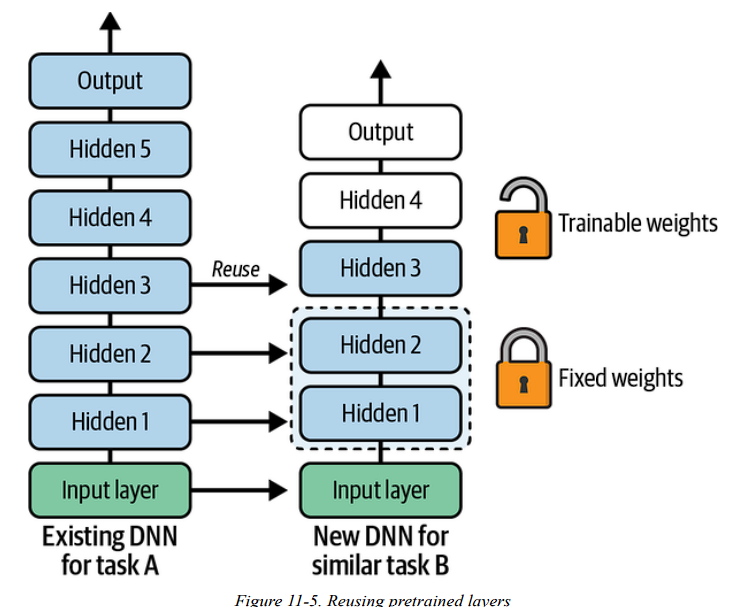


2. the upper hidden layers of the original model are less likely to be
as useful as the lower layers, since the high-level features that are most
useful for the new task may differ significantly from the ones that were
most useful for the original task. You want to find the right number of
layers to reuse.

>TIP:
The more similar the tasks are, the more layers you will want to reuse (starting with the
lower layers). For very similar tasks, try to keep all the hidden layers and just replace
the output layer.

3. Try freezing all the reused layers first (i.e., make their weights non-trainable
so that gradient descent won’t modify them and they will remain fixed),
then train your model and see how it performs. Then try unfreezing one or
two of the top hidden layers to let backpropagation tweak them and see if
performance improves.

4. The more training data you have, the more layers
you can unfreeze. It is also useful to reduce the learning rate when you
unfreeze reused layers: this will avoid wrecking their fine-tuned weights.

5. If you still cannot get good performance, and you have little training data,
try dropping the top hidden layer(s) and freezing all the remaining hidden
layers again. You can iterate until you find the right number of layers to
reuse. If you have plenty of training data, you may try replacing the top
hidden layers instead of dropping them, and even adding more hidden
layers.

### Transfer Learning with keras


In [33]:
"""First, you need to load model A and create a new model based on that
model’s layers. You decide to reuse all the layers except for the output
layer: """

# extra code – split Fashion MNIST into tasks A and B, then train and save
#              model A to "my_model_A".

pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # reorder class ids for A
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(8, activation="softmax")
])

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))
model_A.save("my_model_A.keras")





Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4877 - loss: 1.5936 - val_accuracy: 0.7724 - val_loss: 0.7188
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7805 - loss: 0.6605 - val_accuracy: 0.8223 - val_loss: 0.5295
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8290 - loss: 0.5136 - val_accuracy: 0.8496 - val_loss: 0.4538
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8540 - loss: 0.4435 - val_accuracy: 0.8639 - val_loss: 0.4082
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8672 - loss: 0.3994 - val_accuracy: 0.8726 - val_loss: 0.3790
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8750 - loss: 0.3695 - val_accuracy: 0.8782 - val_loss: 0.3591
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8812 - loss: 0.3482 - val_accuracy: 0.8804 - val_loss: 0.3448
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8858 - loss: 0.3323 - 

In [34]:
# extra code – train and evaluate model B, without reusing model A

tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_B.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))
model_B.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.4595 - loss: 0.6881 - val_accuracy: 0.5895 - val_loss: 0.6676
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5955 - loss: 0.6611 - val_accuracy: 0.7102 - val_loss: 0.6450
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7158 - loss: 0.6364 - val_accuracy: 0.7903 - val_loss: 0.6246
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7927 - loss: 0.6142 - val_accuracy: 0.8338 - val_loss: 0.6058
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8394 - loss: 0.5941 - val_accuracy: 0.8506 - val_loss: 0.5885
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8677 - loss: 0.5758 - val_accuracy: 0.8704 - val_loss: 0.5723
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8927 - loss: 0.5583 - val_accuracy: 0.8843 - val_loss: 0.5569
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8966 - loss: 0.5417 - val_accuracy: 0.8961 - val_loss: 0.5426


[0.4239795207977295, 0.9164999723434448]

In [35]:
model_A = tf.keras.models.load_model("my_model_A.keras")
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [36]:
"""Note that model_A and model_B_on_A now share some layers. When you
train model_B_on_A, it will also affect model_A. If you want to avoid that,
you need to clone model_A before you reuse its layers. To do this, you clone
model A’s architecture with clone_model(), then copy its weights:"""

tf.random.set_seed(42)  # extra code – ensure reproducibility

model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [37]:
# extra code – creating model_B_on_A just like in the previous cell
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [41]:
"""o freeze the reused layers
during the first few epochs, giving the new layer some time to learn
reasonable weights. To do this, set every layer’s trainable attribute to
False and compile the model:"""

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])

"""NOTE: 
You must always compile your model after you freeze or unfreeze layers"""

'NOTE: \nYou must always compile your model after you freeze or unfreeze layers'

In [42]:
"""Now you can train the model for a few epochs, then unfreeze the reused
layers (which requires compiling the model again) and continue training to
fine-tune the reused layers for task B. After unfreezing the reused layers, it
is usually a good idea to reduce the learning rate, once again to avoid
damaging the reused weights.
"""
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))


Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.9377 - loss: 0.3084 - val_accuracy: 0.9238 - val_loss: 0.3166
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9396 - loss: 0.3053 - val_accuracy: 0.9238 - val_loss: 0.3144
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9347 - loss: 0.3029 - val_accuracy: 0.9248 - val_loss: 0.3125
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9347 - loss: 0.3008 - val_accuracy: 0.9258 - val_loss: 0.3107
Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.9366 - loss: 0.2975 - val_accuracy: 0.9228 - val_loss: 0.3033
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9415 - loss: 0.2892 - val_accuracy: 0.9248 - val_loss: 0.2957
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9415 - loss: 0.2810 - val_accuracy: 0.9278 - val_loss: 0.2884
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9396 - loss: 0.2732 - val_accuracy: 0.9288 - val_loss: 0.2817
Epoc

In [43]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9396 - loss: 0.2314


[0.23434484004974365, 0.9365000128746033]

Great! We got a bit of transfer: the model's accuracy went up 2 percentage points, from 91.85% to 93.85%. This means the error rate dropped by almost 25%:

### Undersupervised Pretraining:

1. If you can gather plenty of
unlabeled training data, you can try to use it to train an unsupervised model,
such as an autoencoder or a generative adversarial network (GAN; see
Chapter 17). Then you can reuse the lower layers of the autoencoder or the
lower layers of the GAN’s discriminator, add the output layer for your task
on top, and fine-tune the final network using supervised learning (i.e., with
the labeled training examples).

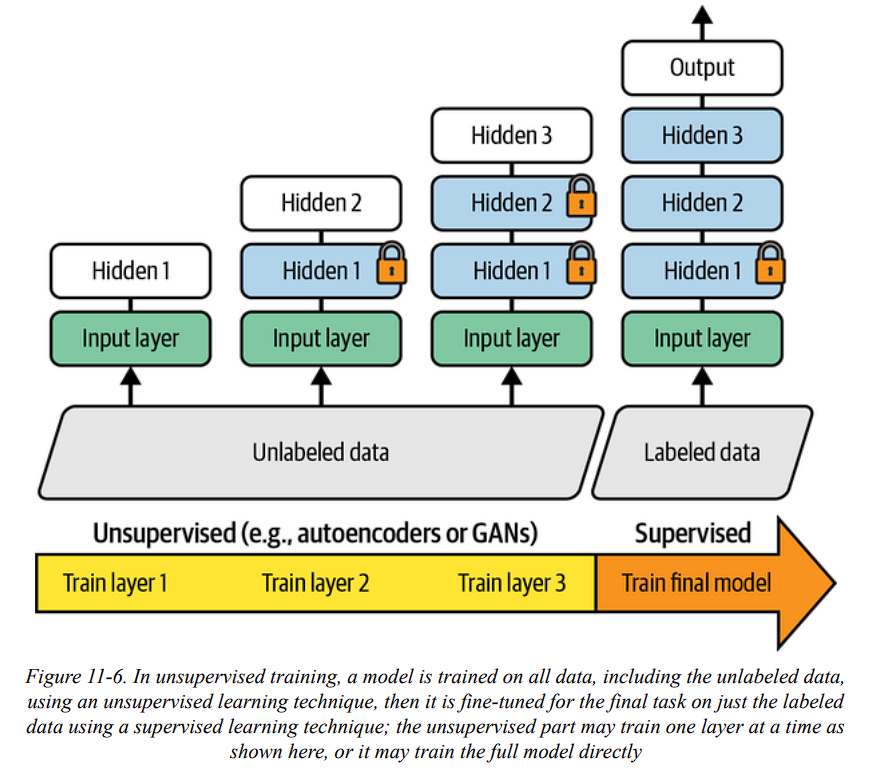


### Pretraining on an Auxiliary Task:

1. If you do not have much labeled training data, one last option is to train a
first neural network on an auxiliary task for which you can easily obtain or
generate labeled training data, then reuse the lower layers of that network
for your actual task. The first neural network’s lower layers will learn
feature detectors that will likely be reusable by the second neural network.

2. For example, if you want to build a system to recognize faces, you may
only have a few pictures of each individual—clearly not enough to train a
good classifier. Gathering hundreds of pictures of each person would not be
practical. You could, however, gather a lot of pictures of random people on
the web and train a first neural network to detect whether or not two
different pictures feature the same person. Such a network would learn good
feature detectors for faces, so reusing its lower layers would allow you to
train a good face classifier that uses little training data.

3. For natural language processing (NLP) applications, you can download a
corpus of millions of text documents and automatically generate labeled
data from it. For example, you could randomly mask out some words and
train a model to predict what the missing words are (e.g., it should predict
that the missing word in the sentence “What ___ you saying?” is probably
“are” or “were”). If you can train a model to reach good performance on
this task, then it will already know quite a lot about language, and you can
certainly reuse it for your actual task and fine-tune it on your labeled data.

> NOTE: 
Self-supervised learning is when you automatically generate the labels from the data
itself, as in the text-masking example, then you train a model on the resulting “labeled”
dataset using supervised learning techniques.

### Faster Optimizers:

1. Momentum:

* Imagine a bowling ball rolling down a gentle slope on a smooth surface: it
will start out slowly, but it will quickly pick up momentum until it
eventually reaches terminal velocity (if there is some friction or air
resistance). This is the core idea behind momentum optimization.

* Recall that gradient descent updates the weights θ by directly subtracting
the gradient of the cost function J(θ) with regard to the weights (∇ J(θ))
multiplied by the learning rate η. The equation is θ ← θ – η∇ J(θ). It does
not care about what the earlier gradients were. If the local gradient is tiny, it
goes very slowly.

* Momentum optimization cares a great deal about what previous gradients
were: at each iteration, it subtracts the local gradient from the momentum
vector m (multiplied by the learning rate η), and it updates the weights by
adding this momentum vector.

* To simulate some sort of
friction mechanism and prevent the momentum from growing too large, the
algorithm introduces a new hyperparameter β, called the momentum, which
must be set between 0 (high friction) and 1 (no friction). A typical
momentum value is 0.9.

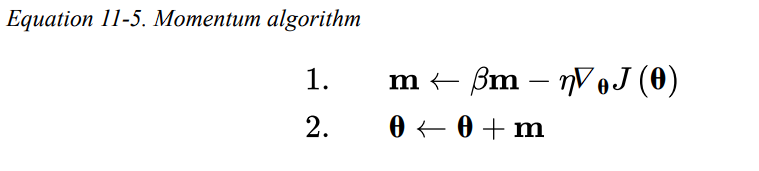

* You can verify that if the gradient remains constant, the terminal velocity
(i.e., the maximum size of the weight updates) is equal to that gradient
multiplied by the learning rate η multiplied by 1 / (1 – β) (ignoring the
sign). For example, if β = 0.9, then the terminal velocity is equal to 10 times
the gradient times the learning rate, so momentum optimization ends up
1. m ← βm − η𝛻𝛉J (𝛉)
2. 𝛉 ← 𝛉 + m
going 10 times faster than gradient descent! This allows momentum
optimization to escape from plateaus much faster than gradient descent.

* Gradient descent
goes down the steep slope quite fast, but then it takes a very long time to go
down the valley. In contrast, momentum optimization will roll down the
valley faster and faster until it reaches the bottom (the optimum). In deep
neural networks that don’t use batch normalization, the upper layers will
often end up having inputs with very different scales, so using momentum
optimization helps a lot. It can also help roll past local optima.

>NOTE:
Due to the momentum, the optimizer may overshoot a bit, then come back, overshoot
again, and oscillate like this many times before stabilizing at the minimum. This is one
of the reasons it’s good to have a bit of friction in the system: it gets rid of these
oscillations and thus speeds up convergence.


In [44]:
# extra code – a little function to test an optimizer on Fashion MNIST

def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

In [45]:
"""Implementing momentum optimization in Keras is a no-brainer: just use the
SGD optimizer and set its momentum hyperparameter, then lie back and
profit!"""

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [64]:
history_momentum = build_and_train_model(optimizer)  # extra code

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6678 - loss: 0.9979 - val_accuracy: 0.8164 - val_loss: 0.5059
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8289 - loss: 0.4860 - val_accuracy: 0.8318 - val_loss: 0.4596
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8466 - loss: 0.4360 - val_accuracy: 0.8456 - val_loss: 0.4266
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8561 - loss: 0.4061 - val_accuracy: 0.8556 - val_loss: 0.4052
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8628 - loss: 0.3842 - val_accuracy: 0.8560 - val_loss: 0.3939
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8688 - loss: 0.3673 - val_accuracy: 0.8568 - val_loss: 0.3884
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8727 - loss: 0.3529 - val_accuracy: 0.8596 - val_loss: 0.3793
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8764 - loss: 0.3407 - 

In [66]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

history_sgd = build_and_train_model(optimizer)  # extra code


C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6593 - loss: 0.9873 - val_accuracy: 0.8134 - val_loss: 0.5188
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8300 - loss: 0.4930 - val_accuracy: 0.8288 - val_loss: 0.4686
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8485 - loss: 0.4382 - val_accuracy: 0.8410 - val_loss: 0.4305
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8583 - loss: 0.4058 - val_accuracy: 0.8474 - val_loss: 0.4069
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8655 - loss: 0.3833 - val_accuracy: 0.8540 - val_loss: 0.3921
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8709 - loss: 0.3655 - val_accuracy: 0.8566 - val_loss: 0.3815
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8744 - loss: 0.3516 - val_accuracy: 0.8590 - val_loss: 0.3770
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8781 - loss: 0.3396 - 

* Drawback:  it adds yet another
hyperparameter to tune. However, the momentum value of 0.9 usually
works well in practice and almost always goes faster than regular gradient
descent.

2. Nesterov Accelerated Gradient:

* The Nesterov accelerated gradient (NAG) method, also known as Nesterov
momentum optimization, measures the gradient of the cost function not at
the local position θ but slightly ahead in the direction of the momentum, at
θ + βm (see Equation 11-6).

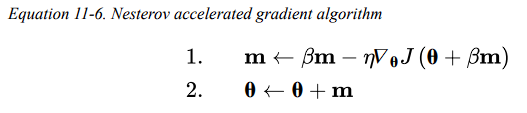

* This small tweak works because in general the momentum vector will be
pointing in the right direction (i.e., toward the optimum), so it will be
slightly more accurate to use the gradient measured a bit farther in that
direction rather than the gradient at the original position, as you can see in
Figure 11-7 (where ∇ represents the gradient of the cost function
measured at the starting point θ, and ∇ represents the gradient at the point
located at θ + βm).

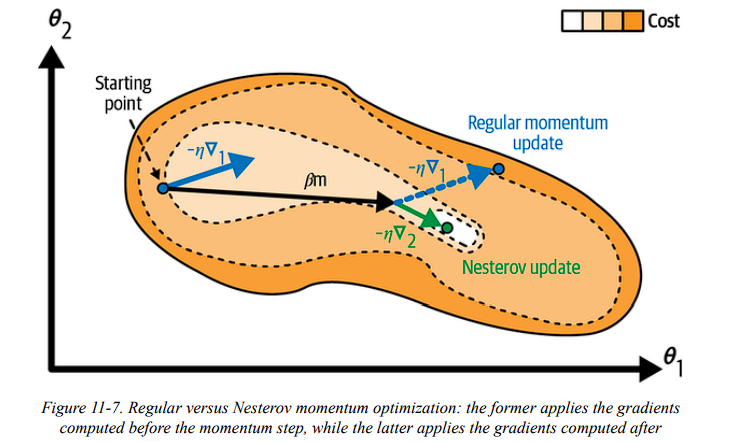

* Moreover, note
that when the momentum pushes the weights across a valley, ∇ continues
to push farther across the valley, while ∇ pushes back toward the bottom
of the valley. This helps reduce oscillations and thus NAG converges faster.



In [48]:
"""To use NAG, simply set nesterov=True when creating the SGD optimizer:"""

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
nesterov=True)


In [49]:
history_nesterov = build_and_train_model(optimizer)  # extra code

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6699 - loss: 0.9901 - val_accuracy: 0.8230 - val_loss: 0.4911
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8319 - loss: 0.4777 - val_accuracy: 0.8410 - val_loss: 0.4433
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8497 - loss: 0.4273 - val_accuracy: 0.8478 - val_loss: 0.4155
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8586 - loss: 0.3980 - val_accuracy: 0.8518 - val_loss: 0.4010
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8648 - loss: 0.3775 - val_accuracy: 0.8534 - val_loss: 0.3929
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8702 - loss: 0.3616 - val_accuracy: 0.8580 - val_loss: 0.3847
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8749 - loss: 0.3483 - val_accuracy: 0.8602 - val_loss: 0.3787
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8794 - loss: 0.3365 - 

3. AdaGrad:

* Consider the elongated bowl problem again: gradient descent starts by
quickly going down the steepest slope, which does not point straight toward
the global optimum, then it very slowly goes down to the bottom of the
valley. It would be nice if the algorithm could correct its direction earlier to
point a bit more toward the global optimum. The AdaGrad algorithm
achieves this correction by scaling down the gradient vector along the
steepest dimensions (see Equation 11-7).

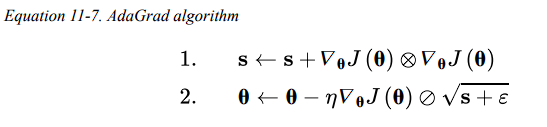

* The first step accumulates the square of the gradients into the vector s. each s_i accumulates the squares of
the partial derivative of the cost function with regard to parameter θ_i . If the
cost function is steep along the ith dimension, then s will get larger and
larger at each iteration.

*  The second step is almost identical to gradient descent, but with one big
difference: the gradient vector is scaled down by a factor of √s + ε (the ⊘
symbol represents the element-wise division, and ε is a smoothing term to
avoid division by zero, typically set to 10^-10 ). This vectorized form is
equivalent to simultaneously computing θi ← θi − η ∂J(𝛉)/ ∂θi/ √(s_i + ε)
for all parameters θ .

* In short, this algorithm decays the learning rate, but it does so faster for
steep dimensions than for dimensions with gentler slopes. This is called an
adaptive learning rate. It helps point the resulting updates more directly
toward the global optimum

* One additional benefit is that
it requires much less tuning of the learning rate hyperparameter η.

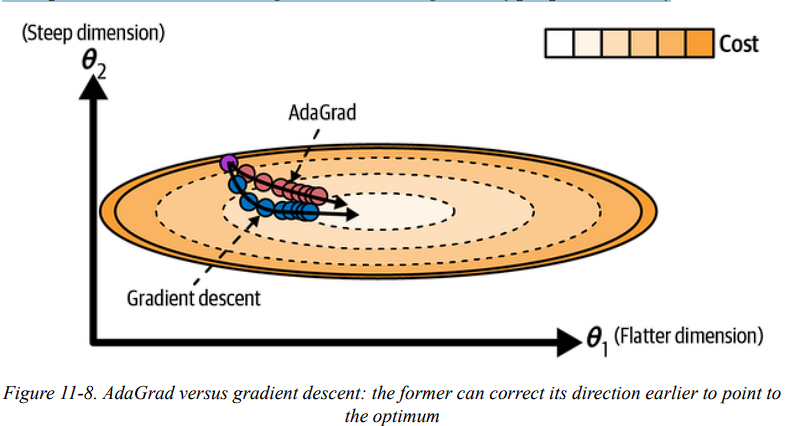

>NOTE: AdaGrad frequently performs well for simple quadratic problems, but it
often stops too early when training neural networks: the learning rate gets
scaled down so much that the algorithm ends up stopping entirely before
reaching the global optimum. So even though Keras has an Adagrad
optimizer, you should not use it to train deep neural networks (it may be
efficient for simpler tasks such as linear regression, though). Still,
understanding AdaGrad is helpful to comprehend the other adaptive
learning rate optimizers.


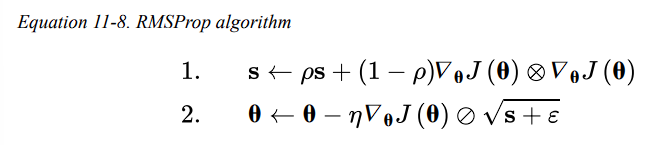

In [50]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [51]:
history_adagrad = build_and_train_model(optimizer)  # extra code

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5528 - loss: 1.4049 - val_accuracy: 0.7732 - val_loss: 0.7065
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7701 - loss: 0.6906 - val_accuracy: 0.8010 - val_loss: 0.5947
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8027 - loss: 0.5973 - val_accuracy: 0.8158 - val_loss: 0.5445
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8176 - loss: 0.5517 - val_accuracy: 0.8266 - val_loss: 0.5154
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8251 - loss: 0.5241 - val_accuracy: 0.8320 - val_loss: 0.4958
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8303 - loss: 0.5050 - val_accuracy: 0.8388 - val_loss: 0.4816
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8343 - loss: 0.4908 - val_accuracy: 0.8410 - val_loss: 0.4705
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8376 - loss: 0.4795 - 

4. RMSProp:

* As we’ve seen, AdaGrad runs the risk of slowing down a bit too fast and
never converging to the global optimum. The RMSProp algorithm fixes
this by accumulating only the gradients from the most recent iterations, as
opposed to all the gradients since the beginning of training. It does so by
using exponential decay in the first step. (see equation 11-8).

 
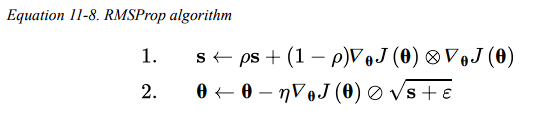

* The decay rate ρ is typically set to 0.9. Yes, it is once again a new
hyperparameter, but this default value often works well, so you may not
need to tune it at all.

* Except on very simple problems, this optimizer almost always performs
much better than AdaGrad. In fact, it was the preferred optimization
algorithm of many researchers until Adam optimization came around.



In [52]:
""" As you might expect, Keras has an RMSprop optimizer: """

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [53]:
history_rmsprop = build_and_train_model(optimizer)  # extra code

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7621 - loss: 0.6571 - val_accuracy: 0.8440 - val_loss: 0.4212
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8562 - loss: 0.3999 - val_accuracy: 0.8456 - val_loss: 0.4373
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8690 - loss: 0.3659 - val_accuracy: 0.8592 - val_loss: 0.4143
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8783 - loss: 0.3506 - val_accuracy: 0.8608 - val_loss: 0.4092
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8792 - loss: 0.3445 - val_accuracy: 0.8536 - val_loss: 0.4626
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8833 - loss: 0.3384 - val_accuracy: 0.8536 - val_loss: 0.5272
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8866 - loss: 0.3356 - val_accuracy: 0.8518 - val_loss: 0.5607
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8865 - loss: 0.3345 - 

5. Adam: adaptive moment estimation

* combines the ideas
of momentum optimization and RMSProp: just like momentum
optimization, it keeps track of an exponentially decaying average of past
gradients; and just like RMSProp, it keeps track of an exponentially
decaying average of past squared gradients (see Equation 11-9).

* These are
estimations of the mean and (uncentered) variance of the gradients. The
mean is often called the first moment while the variance is often called the
second moment, hence the name of the algorithm.

#### Equation 11-9 : Adam Algo

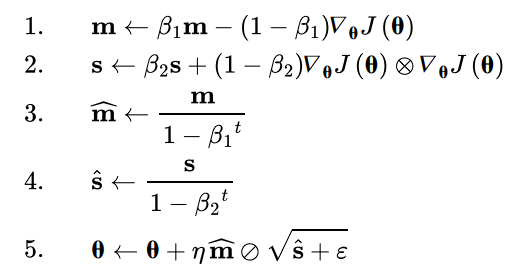

* β_1 corresponds to β in
momentum optimization, and β_2 corresponds to ρ in RMSProp.

*  The only
difference is that step 1 computes an exponentially decaying average rather
than an exponentially decaying sum, but these are actually equivalent
except for a constant factor (the decaying average is just 1 – β_1 times the
decaying sum). Steps 3 and 4 are somewhat of a technical detail: since m
and s are initialized at 0, they will be biased toward 0 at the beginning of
training, so these two steps will help boost m and s at the beginning of
training.

* The momentum decay hyperparameter β is typically initialized to 0.9,
while the scaling decay hyperparameter β is often initialized to 0.999. As
earlier, the smoothing term ε is usually initialized to a tiny number such as
10 . These are the default values for the Adam class.

* Since Adam is an adaptive learning rate algorithm, like AdaGrad and
RMSProp, it requires less tuning of the learning rate hyperparameter η. You
can often use the default value η = 0.001, making Adam even easier to use
than gradient descent.




In [54]:
""" Here is how to create an Adam optimizer using Keras: """

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)

In [55]:
history_adam = build_and_train_model(optimizer)  # extra code

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7754 - loss: 0.6448 - val_accuracy: 0.8252 - val_loss: 0.4501
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8575 - loss: 0.3892 - val_accuracy: 0.8520 - val_loss: 0.3901
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8751 - loss: 0.3443 - val_accuracy: 0.8510 - val_loss: 0.3982
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8831 - loss: 0.3164 - val_accuracy: 0.8582 - val_loss: 0.3865
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8917 - loss: 0.2936 - val_accuracy: 0.8728 - val_loss: 0.3516
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8955 - loss: 0.2788 - val_accuracy: 0.8740 - val_loss: 0.3530
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9001 - loss: 0.2654 - val_accuracy: 0.8660 - val_loss: 0.3919
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9036 - loss: 0.2547 - 

* Variants of Adam:
    * AdaMax: 
        * AdaMax replaces the ℓ norm with the ℓ norm (a fancy way of saying the
        max). Specifically, it replaces step 2 in Equation 11-9 with 
        s <- max(β2s, abs( ∇_𝛉J(𝛉))), it drops step 4, and in step 5 it scales
        down the gradient updates by a factor of s, which is the max of the absolute value of the time-decayed gradients.

        * In practice, this can make AdaMax more stable than Adam, but it really
        depends on the dataset, and in general Adam performs better. So, this is just
        one more optimizer you can try if you experience problems with Adam on
        some task.

    * Nadam:
        * Nadam optimization is Adam optimization plus the Nesterov trick, so it will
        often converge slightly faster than Adam Nadam generally outperforms
        Adam but is sometimes outperformed by RMSProp.

    * AdamW:
        * variant of Adam that integrates a regularization technique
        called weight decay. Weight decay reduces the size of the model’s weights
        at each training iteration by multiplying them by a decay factor such as
        0.99. This may remind you of ℓ regularization.

        * when using Adam or its variants, ℓ regularization
        and weight decay are not equivalent: in practice, combining Adam with ℓ
        regularization results in models that often don’t generalize as well as those
        produced by SGD. AdamW fixes this issue by properly combining Adam
        with weight decay.

> WARNING:
Adaptive optimization methods (including RMSProp, Adam, AdaMax, Nadam, and
AdamW optimization) are often great, converging fast to a good solution. However, a
2017 paper by Ashia C. Wilson et al. showed that they can lead to solutions that
generalize poorly on some datasets. So when you are disappointed by your model’s
performance, try using NAG instead: your dataset may just be allergic to adaptive
gradients. Also check out the latest research, because it’s moving fast.


In [56]:
# Adamax optimization:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9,
                                       beta_2=0.999)

history_adamax = build_and_train_model(optimizer)  # extra code

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7609 - loss: 0.7001 - val_accuracy: 0.8354 - val_loss: 0.4397
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8550 - loss: 0.4123 - val_accuracy: 0.8514 - val_loss: 0.3919
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8681 - loss: 0.3688 - val_accuracy: 0.8602 - val_loss: 0.3730
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8773 - loss: 0.3391 - val_accuracy: 0.8628 - val_loss: 0.3638
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8836 - loss: 0.3180 - val_accuracy: 0.8640 - val_loss: 0.3616
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8898 - loss: 0.3017 - val_accuracy: 0.8654 - val_loss: 0.3617
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8956 - loss: 0.2879 - val_accuracy: 0.8704 - val_loss: 0.3538
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8999 - loss: 0.2764 - 

In [58]:
# Nadam Optimization:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001,beta_1=0.9,
                                     beta_2=0.999)

history_nadam = build_and_train_model(optimizer)

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7813 - loss: 0.6208 - val_accuracy: 0.8430 - val_loss: 0.4177
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8613 - loss: 0.3810 - val_accuracy: 0.8484 - val_loss: 0.3992
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8742 - loss: 0.3412 - val_accuracy: 0.8592 - val_loss: 0.3765
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8844 - loss: 0.3142 - val_accuracy: 0.8590 - val_loss: 0.3708
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8917 - loss: 0.2954 - val_accuracy: 0.8732 - val_loss: 0.3493
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8963 - loss: 0.2783 - val_accuracy: 0.8654 - val_loss: 0.3765
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9005 - loss: 0.2653 - val_accuracy: 0.8734 - val_loss: 0.3664
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9036 - loss: 0.2542 -

In [59]:
# AdamW Optimization:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5,learning_rate=0.001,
                                      beta_1=0.9,beta_2=0.999)

history_AdamW = build_and_train_model(optimizer)

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7766 - loss: 0.6351 - val_accuracy: 0.8426 - val_loss: 0.4026
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8584 - loss: 0.3895 - val_accuracy: 0.8508 - val_loss: 0.3746
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8731 - loss: 0.3438 - val_accuracy: 0.8640 - val_loss: 0.3626
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8810 - loss: 0.3190 - val_accuracy: 0.8630 - val_loss: 0.3562
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8902 - loss: 0.2984 - val_accuracy: 0.8696 - val_loss: 0.3569
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8947 - loss: 0.2835 - val_accuracy: 0.8714 - val_loss: 0.3587
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8990 - loss: 0.2707 - val_accuracy: 0.8704 - val_loss: 0.3584
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9031 - loss: 0.2583 -

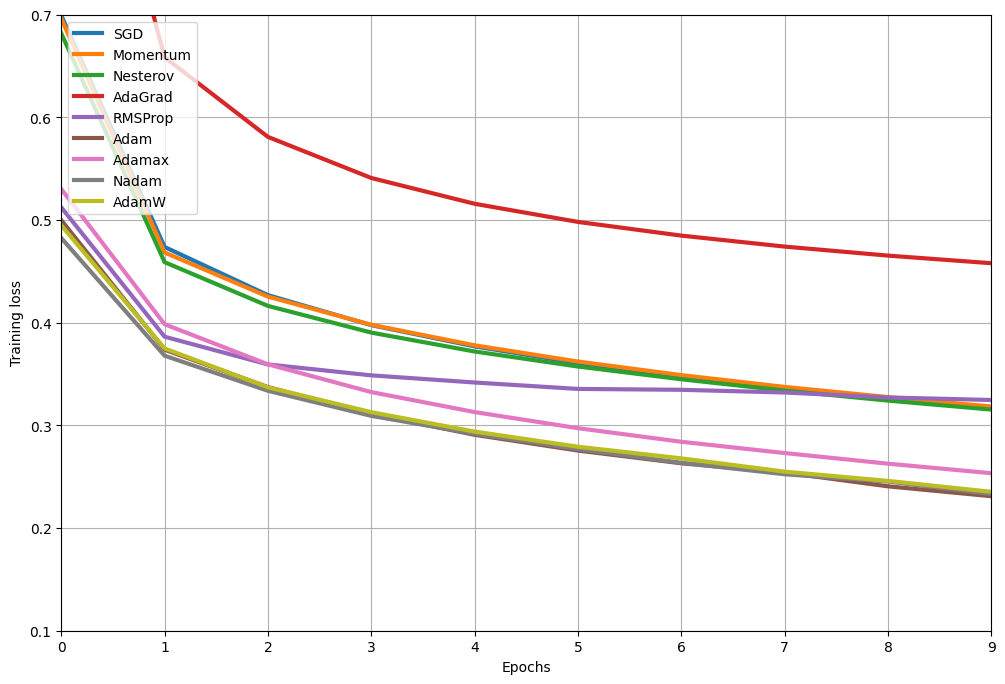

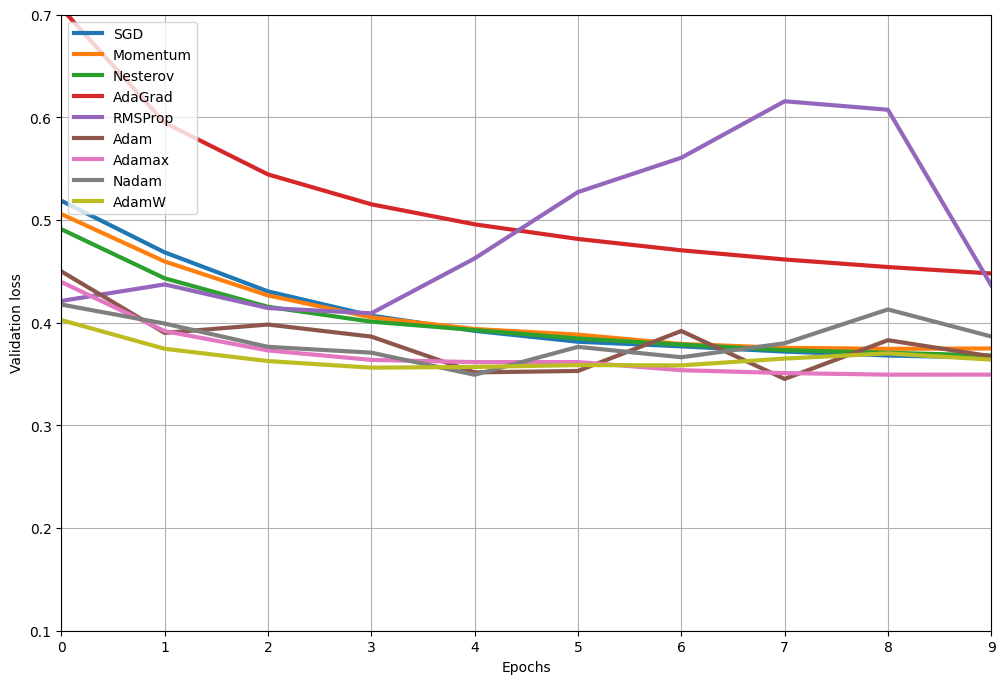

In [67]:
# extra code – visualize the learning curves of all the optimizers
import matplotlib.pyplot as plt
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
                                  history_adamax, history_nadam, history_AdamW),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

### TRAINING SPARSE MODELS:

1. All the optimization algorithms we just discussed produce dense
models, meaning that most parameters will be nonzero. If you need a
blazingly fast model at runtime, or if you need it to take up less
memory, you may prefer to end up with a sparse model instead.

2. One way to achieve this is to train the model as usual, then get rid of the
tiny weights (set them to zero). However, this will typically not lead to
a very sparse model, and it may degrade the model’s performance.

3. A better option is to apply strong ℓ regularization during training
(you’ll see how later in this chapter), as it pushes the optimizer to zero
out as many weights as it can.

4. If these techniques remain insufficient, check out the TensorFlow
Model Optimization Toolkit (TF-MOT), which provides a pruning API
capable of iteratively removing connections during training based on
their magnitude.  

#### Table 11-2 compares all the optimizers we’ve discussed so far (* is bad, ** is average, and *** is good).

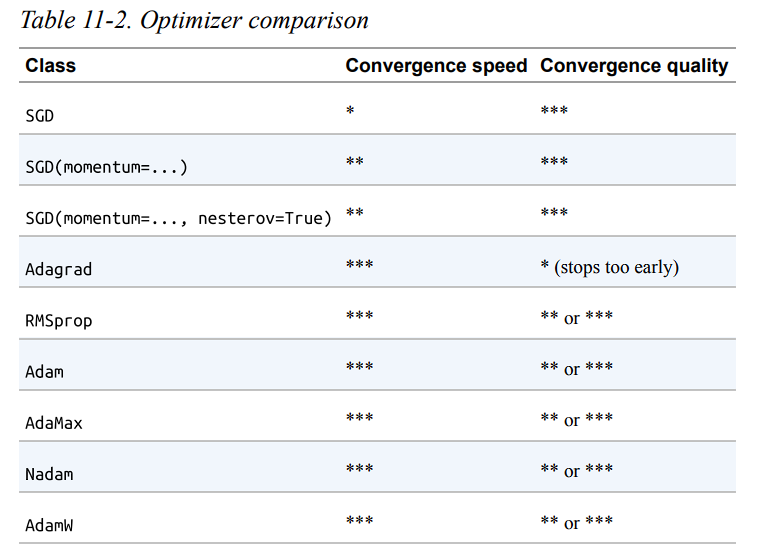

### Learning Rate Scheduling:

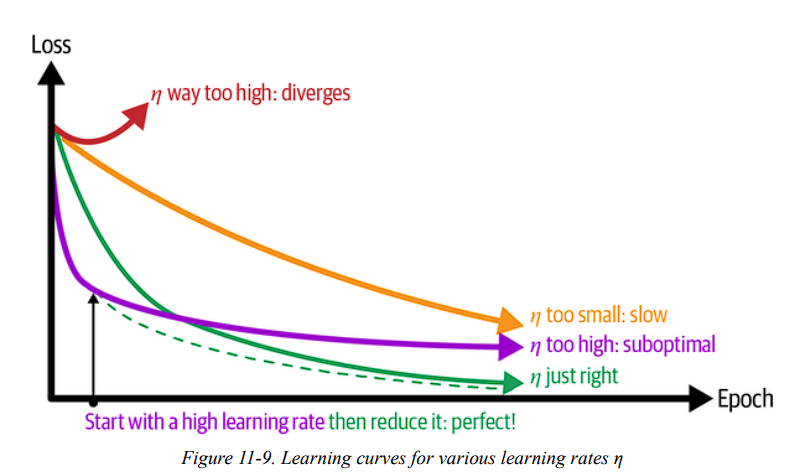

1. you can find a good learning rate by training
the model for a few hundred iterations, exponentially increasing the
learning rate from a very small value to a very large value, and then looking
at the learning curve and picking a learning rate slightly lower than the one
at which the learning curve starts shooting back up. You can then
reinitialize your model and train it with that learning rate.

2. But you can do better than a constant learning rate: if you start with a large
learning rate and then reduce it once training stops making fast progress,
you can reach a good solution faster than with the optimal constant learning
rate. There are many different strategies to reduce the learning rate during
training. It can also be beneficial to start with a low learning rate, increase
it, then drop it again. These strategies are called learning schedules.

3. types:
* Power Scheduling:
Set the learning rate to a function of the iteration number t: η(t) = η_0 / (1
\+ t/s)^c . The initial learning rate η_0 , the power c (typically set to 1), and
the steps s are hyperparameters. The learning rate drops at each step.
After s steps, the learning rate is down to η_0 / 2. After s more steps it is
down to η_0 / 3, then it goes down to η_0 / 4, then η_0 / 5, and so on. As you
can see, this schedule first drops quickly, then more and more slowly.
Of course, power scheduling requires tuning η_0 and s (and possibly c).




In [ ]:
# learning_rate = initial_learning_rate / (1 + step / decay_steps)**power
# keras uses power=1

In [68]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [69]:
history_power_scheduling = build_and_train_model(optimizer)  # extra code

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6960 - loss: 0.9509 - val_accuracy: 0.8254 - val_loss: 0.4942
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8271 - loss: 0.4914 - val_accuracy: 0.8414 - val_loss: 0.4448
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8467 - loss: 0.4389 - val_accuracy: 0.8472 - val_loss: 0.4211
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8564 - loss: 0.4100 - val_accuracy: 0.8510 - val_loss: 0.4081
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8635 - loss: 0.3903 - val_accuracy: 0.8566 - val_loss: 0.3980
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8673 - loss: 0.3759 - val_accuracy: 0.8620 - val_loss: 0.3891
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8710 - loss: 0.3644 - val_accuracy: 0.8634 - val_loss: 0.3825
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8738 - loss: 0.3549 - 

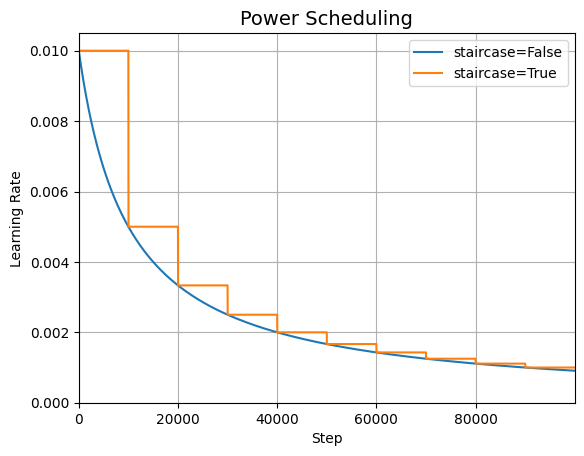

In [70]:
# extra code – this cell plots power scheduling with staircase=True or False

initial_learning_rate = 0.01
decay_rate = 1.0
decay_steps = 10_000

import numpy as np
steps = np.arange(100_000)
lrs = initial_learning_rate / (1 + decay_rate * steps / decay_steps)
lrs2 = initial_learning_rate / (1 + decay_rate * np.floor(steps / decay_steps))

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

* Exponential Scheduling: 
Set the learning rate to η(t) = η_0 0.1^(t/s) . The learning rate will gradually
drop by a factor of 10 every s steps. While power scheduling reduces
the learning rate more and more slowly, exponential scheduling keeps
slashing it by a factor of 10 every s step



In [ ]:
# learning_rate = initial_learning_rate * decay_rate ** (step / decay_steps)

In [71]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=20_000,
    decay_rate=0.1,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [72]:
history_exponential_scheduling = build_and_train_model(optimizer)  # extra code

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6677 - loss: 1.0106 - val_accuracy: 0.8230 - val_loss: 0.4970
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8269 - loss: 0.4986 - val_accuracy: 0.8384 - val_loss: 0.4463
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8452 - loss: 0.4421 - val_accuracy: 0.8468 - val_loss: 0.4234
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8548 - loss: 0.4127 - val_accuracy: 0.8514 - val_loss: 0.4080
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8618 - loss: 0.3940 - val_accuracy: 0.8552 - val_loss: 0.3969
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8666 - loss: 0.3808 - val_accuracy: 0.8574 - val_loss: 0.3887
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8698 - loss: 0.3708 - val_accuracy: 0.8584 - val_loss: 0.3826
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8725 - loss: 0.3632 - 

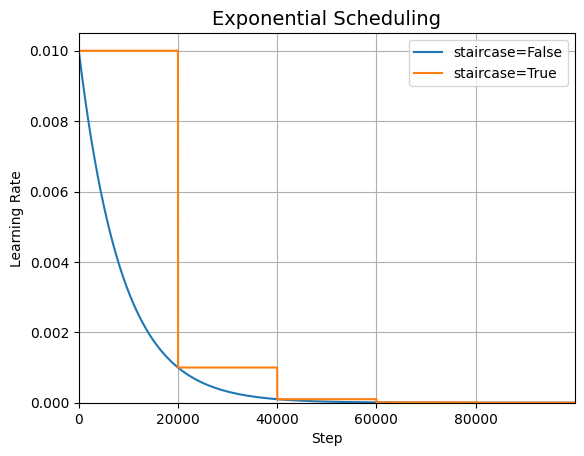

In [73]:
# extra code – this cell plots exponential scheduling

initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Keras also provides a LearningRateScheduler callback class that lets you define your own scheduling function. Let's see how you could use it to implement exponential decay. Note that in this case the learning rate only changes at each epoch, not at each step:

In [74]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 ** (epoch / 20)

In [75]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [76]:
# extra code – build and compile a model for Fashion MNIST

tf.random.set_seed(42)
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [77]:
n_epochs = 20

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6687 - loss: 0.9876 - val_accuracy: 0.8258 - val_loss: 0.4836 - learning_rate: 0.0100
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8286 - loss: 0.4879 - val_accuracy: 0.8340 - val_loss: 0.4386 - learning_rate: 0.0089
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8455 - loss: 0.4351 - val_accuracy: 0.8468 - val_loss: 0.4141 - learning_rate: 0.0079
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8545 - loss: 0.4062 - val_accuracy: 0.8548 - val_loss: 0.3999 - learning_rate: 0.0071
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8613 - loss: 0.3864 - val_accuracy: 0.8564 - val_loss: 0.3902 - learning_rate: 0.0063
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8669 - loss: 0.3716 - val_accuracy: 0.8604 - val_loss: 0.3811 - learning_rate: 0.0056
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8703 - l

Alternatively, the schedule function can take the current learning rate as a second argument:

In [78]:
def exponential_decay_fn(epoch,lr):
    return lr*0.1**(1/20)

if you want to use a custom scheduling function that updates the learning rate at each iteration rather than at each epoch, you can write your own callback class like this:

In [79]:
K = tf.keras.backend

class ExponentialDecay(tf.keras.callbacks.Callback):
    def __init__(self,n_steps=40_000):
        super().__init__()
        self.n_steps = n_steps

    def on_batch_begin(self,batch,logs=None):
        # Note: the batch argument is reset at each epoch
        lr = self.model.optimizer.learning_rate.numpy()
        new_learning_rate = lr*0.1**(1/self.n_steps)
        self.model.optimizer.learning_rate = new_learning_rate

    def on_epoch_end(self,epoch,logs=None):
        logs = logs or {}
        logs['lr'] = self.model.optimizer.learning_rate.numpy()

In [80]:
lr0 = 0.01
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = optimizer,
              metrics=["accuracy"])

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
import math
batch_size = 32
n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
exp_decay = ExponentialDecay(n_steps)
history = model.fit(X_train,y_train,epochs=n_epochs,
                    validation_data=(X_valid,y_valid),
                    callbacks=[exp_decay])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6772 - loss: 0.9768 - val_accuracy: 0.8294 - val_loss: 0.4784 - lr: 0.0089
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8265 - loss: 0.4906 - val_accuracy: 0.8398 - val_loss: 0.4346 - lr: 0.0079
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8446 - loss: 0.4371 - val_accuracy: 0.8456 - val_loss: 0.4168 - lr: 0.0071
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8547 - loss: 0.4076 - val_accuracy: 0.8500 - val_loss: 0.4058 - lr: 0.0063
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8622 - loss: 0.3878 - val_accuracy: 0.8562 - val_loss: 0.3950 - lr: 0.0056
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8667 - loss: 0.3731 - val_accuracy: 0.8578 - val_loss: 0.3876 - lr: 0.0050
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8711 - loss: 0.3614 - val_accuracy: 0.8586 - val_loss: 0.3805 - lr: 0.0045

* Piecewise constant scheduling:
Use a constant learning rate for a number of epochs (e.g., η_0 = 0.1 for 5
epochs), then a smaller learning rate for another number of epochs (e.g.,
η_1 = 0.001 for 50 epochs), and so on. Although this solution can work
very well, it requires fiddling around to figure out the right sequence of
learning rates and how long to use each of them.



In [82]:
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[50_000,80_000],
    values=[0.01,0.005,0.001]
)

optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

history_piecewise_scheduling = build_and_train_model(optimizer)

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6701 - loss: 0.9684 - val_accuracy: 0.8358 - val_loss: 0.4772
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8278 - loss: 0.4914 - val_accuracy: 0.8512 - val_loss: 0.4248
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8473 - loss: 0.4340 - val_accuracy: 0.8560 - val_loss: 0.4097
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8569 - loss: 0.4032 - val_accuracy: 0.8570 - val_loss: 0.4004
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8637 - loss: 0.3819 - val_accuracy: 0.8582 - val_loss: 0.3907
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8682 - loss: 0.3650 - val_accuracy: 0.8616 - val_loss: 0.3877
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8730 - loss: 0.3511 - val_accuracy: 0.8626 - val_loss: 0.3836
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8768 - loss: 0.3391 - 

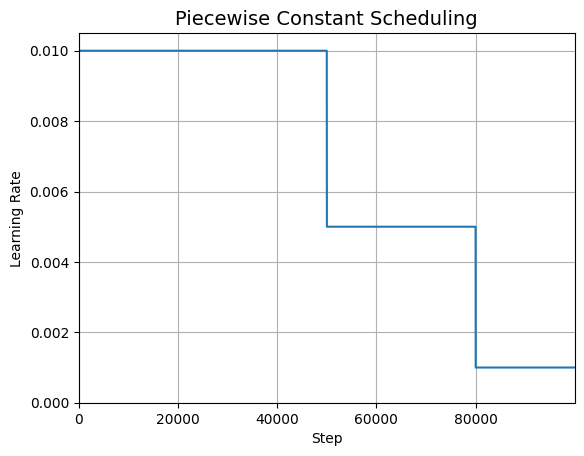

In [83]:
# extra code – this cell plots piecewise constant scheduling

boundaries = [50_000, 80_000]
values = [0.01, 0.005, 0.001]

steps = np.arange(100_000)

lrs = np.full(len(steps), values[0])
for boundary, value in zip(boundaries, values[1:]):
    lrs[boundary:] = value

plt.plot(steps, lrs, "-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Just like we did with exponential scheduling, we could also implement piecewise constant scheduling manually:

In [84]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [85]:
# A more general way:
def piecewise_constant(boundaries,values):
    boundaries = np.array([0]+boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[(boundaries > epoch).argmax() - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5,15],[0.01,0.005,0.001])

In [86]:
n_epochs = 25

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = build_model()
optimizer = tf.keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train,y_train,epochs= n_epochs,
                    validation_data=(X_valid,y_valid),
                    callbacks=[lr_scheduler])

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7604 - loss: 0.6904 - val_accuracy: 0.8214 - val_loss: 0.4971 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8389 - loss: 0.4606 - val_accuracy: 0.8354 - val_loss: 0.4556 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8459 - loss: 0.4466 - val_accuracy: 0.8340 - val_loss: 0.4580 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8555 - loss: 0.4175 - val_accuracy: 0.8308 - val_loss: 0.4703 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8586 - loss: 0.4077 - val_accuracy: 0.8238 - val_loss: 0.5700 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8686 - loss: 0.3668 - val_accuracy: 0.8488 - val_loss: 0.4309 - learning_rate: 0.0050
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8745 - 

In [87]:
"""We've looked at InverseTimeDecay, ExponentialDecay, and PiecewiseConstantDecay. A few more schedulers are available in tf.keras.optimizers.schedules, here is the full list:"""
for name in sorted(dir(tf.keras.optimizers.schedules)):
    if name[0] == name[0].lower():  # must start with capital letter
        continue
    scheduler_class = getattr(tf.keras.optimizers.schedules, name)
    print(f"• {name} – {scheduler_class.__doc__.splitlines()[0]}")

• CosineDecay – A `LearningRateSchedule` that uses a cosine decay with optional warmup.
• CosineDecayRestarts – A `LearningRateSchedule` that uses a cosine decay schedule with restarts.
• ExponentialDecay – A `LearningRateSchedule` that uses an exponential decay schedule.
• InverseTimeDecay – A `LearningRateSchedule` that uses an inverse time decay schedule.
• LearningRateSchedule – The learning rate schedule base class.
• PiecewiseConstantDecay – A `LearningRateSchedule` that uses a piecewise constant decay schedule.
• PolynomialDecay – A `LearningRateSchedule` that uses a polynomial decay schedule.


* Performance scheduling:
Measure the validation error every N steps (just like for early stopping),
and reduce the learning rate by a factor of λ when the error stops
dropping.




In [93]:
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)

history = model.fit(X_train,y_train,epochs=n_epochs,
                    validation_data=(X_valid,y_valid),
                    callbacks=[lr_scheduler])

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6696 - loss: 0.9831 - val_accuracy: 0.8160 - val_loss: 0.4959 - learning_rate: 0.0100
Epoch 2/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8270 - loss: 0.4929 - val_accuracy: 0.8360 - val_loss: 0.4471 - learning_rate: 0.0100
Epoch 3/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8451 - loss: 0.4366 - val_accuracy: 0.8466 - val_loss: 0.4263 - learning_rate: 0.0100
Epoch 4/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8555 - loss: 0.4049 - val_accuracy: 0.8514 - val_loss: 0.4125 - learning_rate: 0.0100
Epoch 5/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8631 - loss: 0.3828 - val_accuracy: 0.8534 - val_loss: 0.4043 - learning_rate: 0.0100
Epoch 6/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8694 - loss: 0.3653 - val_accuracy: 0.8548 - val_loss: 0.3998 - learning_rate: 0.0100
Epoch 7/25
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8737 - l

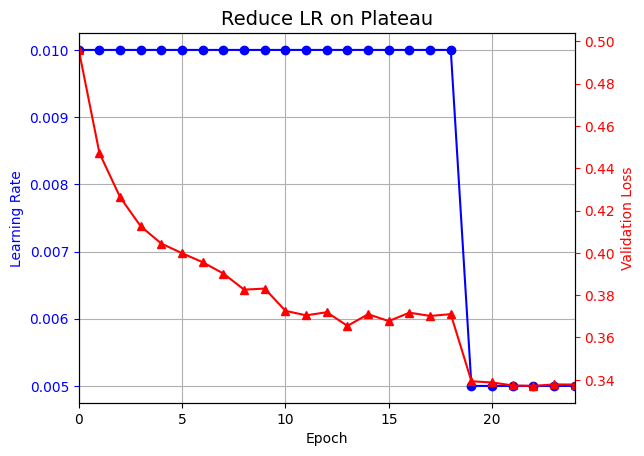

In [94]:
# extra code – this cell plots performance scheduling

plt.plot(history.epoch, history.history["learning_rate"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

* 1cycle scheduling:
1cycle was introduced in a 2018 paper by Leslie Smith. Contrary to
the other approaches, it starts by increasing the initial learning rate η_0 ,
growing linearly up to η_1 halfway through training. Then it decreases
the learning rate linearly down to η_0 again during the second half of
training, finishing the last few epochs by dropping the rate down by
several orders of magnitude (still linearly). The maximum learning rate
η is chosen using the same approach we used to find the optimal
learning rate, and the initial learning rate η_0 is usually 10 times lower.
When using a momentum, we start with a high momentum first (e.g.,
0.95), then drop it down to a lower momentum during the first half of
training (e.g., down to 0.85, linearly), and then bring it back up to the
maximum value (e.g., 0.95) during the second half of training, finishing
the last few epochs with that maximum value. Smith did many
experiments showing that this approach was often able to speed up
training considerably and reach better performance. For example, on the
popular CIFAR10 image dataset, this approach reached 91.9%
validation accuracy in just 100 epochs, compared to 90.3% accuracy in
800 epochs through a standard approach (with the same neural network
architecture). This feat was dubbed super-convergence

In [100]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]  # the epoch's mean loss so far 
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        lr = self.model.optimizer.learning_rate.numpy()
        self.rates.append(lr)
        self.losses.append(batch_loss)
        self.model.optimizer.learning_rate = lr * self.factor

The find_learning_rate() function trains the model using the ExponentialLearningRate callback, and it returns the learning rates and corresponding batch losses. At the end, it restores the model and its optimizer to their initial state.

In [101]:
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4,
                       max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    model.optimizer.learning_rate = min_rate
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    model.optimizer.learning_rate = init_lr
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [102]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.grid()

The plot_lr_vs_loss() function plots the learning rates vs the losses. The optimal learning rate to use as the maximum learning rate in 1cycle is near the bottom of the curve.

In [103]:
model = build_model()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2496 - loss: 931209415828299686920264351744.0000


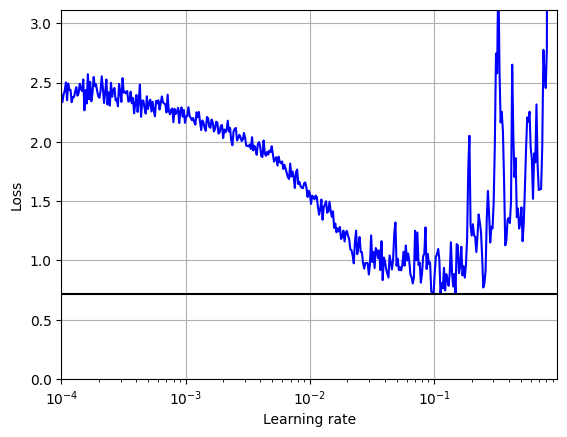

In [104]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

Looks like the max learning rate to use for 1cycle is around 10–1.

The OneCycleScheduler custom callback updates the learning rate at the beginning of each batch. It applies the logic described in the book: increase the learning rate linearly during about half of training, then reduce it linearly back to the initial learning rate, and lastly reduce it down to close to zero linearly for the very last part of training.

In [105]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self,iterations,max_lr = 1e-3,start_lr=None,
                 last_iterations=None,last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self,iter1,iter2,lr1,lr2):
        return (lr2-lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1
    
    def on_batch_begin(self,batch,logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0,self.half_iteration,self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr,self.start_lr)
        else:
            lr = self._interpolate(2* self.half_iteration,self.iterations,
                                   self.max_lr,self.last_lr)
        self.iteration += 1
        self.model.optimizer.learning_rate = lr


In [106]:
model = build_model()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs,
                             max_lr=0.1)
history = model.fit(X_train,y_train,epochs=n_epochs,batch_size=batch_size,
                    validation_data=(X_valid,y_valid),
                    callbacks=[onecycle])

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5693 - loss: 1.3553 - val_accuracy: 0.7982 - val_loss: 0.5859
Epoch 2/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7912 - loss: 0.5995 - val_accuracy: 0.8206 - val_loss: 0.5134
Epoch 3/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8181 - loss: 0.5172 - val_accuracy: 0.8148 - val_loss: 0.5132
Epoch 4/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8348 - loss: 0.4693 - val_accuracy: 0.8160 - val_loss: 0.5020
Epoch 5/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8463 - loss: 0.4332 - val_accuracy: 0.8274 - val_loss: 0.4645
Epoch 6/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8570 - loss: 0.4061 - val_accuracy: 0.8304 - val_loss: 0.4560
Epoch 7/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8617 - loss: 0.3860 - val_accuracy: 0.8428 - val_loss: 0.4235
Epoch 8/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8677 - loss: 0.3687 - val_accuracy: 0.

>TIP:
After training, history.history["lr"] gives you access to the list of learning rates
used during training.



1. When you save a model, the optimizer and its learning rate get saved along
with it. This means that with this new schedule function, you could just load
a trained model and continue training where it left off, no problem.

2. Things
are not so simple if your schedule function uses the epoch argument,
however: the epoch does not get saved, and it gets reset to 0 every time you
call the fit() method. If you were to continue training a model where it
left off, this could lead to a very large learning rate, which would likely
damage your model’s weights. One solution is to manually set the fit()
method’s initial_epoch argument so the epoch starts at the right value

### Avoiding Overfitting Through Regularization:

1. ℓ1 and ℓ2 Regularization:

* you can use ℓ2
regularization to constrain a neural network’s connection weights, and/or ℓ1
regularization if you want a sparse model (with many weights equal to 0).

* The l2() function returns a regularizer that will be called at each step
during training to compute the regularization loss. This is then added to the
final loss.



In [107]:
""" to apply ℓ regularization to a Keras layer’s connection
weights, using a regularization factor of 0.01:"""

layer = tf.keras.layers.Dense(100, activation="relu", 
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))


Or use l1(0.1) for ℓ1 regularization with a factor of 0.1, or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively.

* Since you will typically want to apply the same regularizer to all layers in
your network, as well as using the same activation function and the same
initialization strategy in all hidden layers, you may find yourself repeating
the same arguments. This makes the code ugly and error-prone. To avoid
this, you can try refactoring your code to use loops. Another option is to use
Python’s functools.partial() function, which lets you create a thin
wrapper for any callable, with some default argument values:

In [108]:
tf.random.set_seed(42)

In [112]:
from functools import partial
RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

In [113]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train,y_train,epochs=2,
                    validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6931 - loss: 4.1248 - val_accuracy: 0.8228 - val_loss: 1.8726
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8139 - loss: 1.6323 - val_accuracy: 0.8238 - val_loss: 1.1218


> WARNING
As we saw earlier, ℓ regularization is fine when using SGD, momentum optimization,
and Nesterov momentum optimization, but not with Adam and its variants. If you want
to use Adam with weight decay, then do not use ℓ regularization: use AdamW instead.

2. Dropout:

* It is a fairly simple algorithm: at every training step, every neuron
(including the input neurons, but always excluding the output neurons) has
a probability p of being temporarily “dropped out”, meaning it will be
entirely ignored during this training step, but it may be active during the
next step (see Figure 11-10). The hyperparameter p is called the dropout
rate, and it is typically set between 10% and 50%: closer to 20%–30% in
recurrent neural nets (see Chapter 15), and closer to 40%–50% in
convolutional neural networks (see Chapter 14). After training, neurons
don’t get dropped anymore.
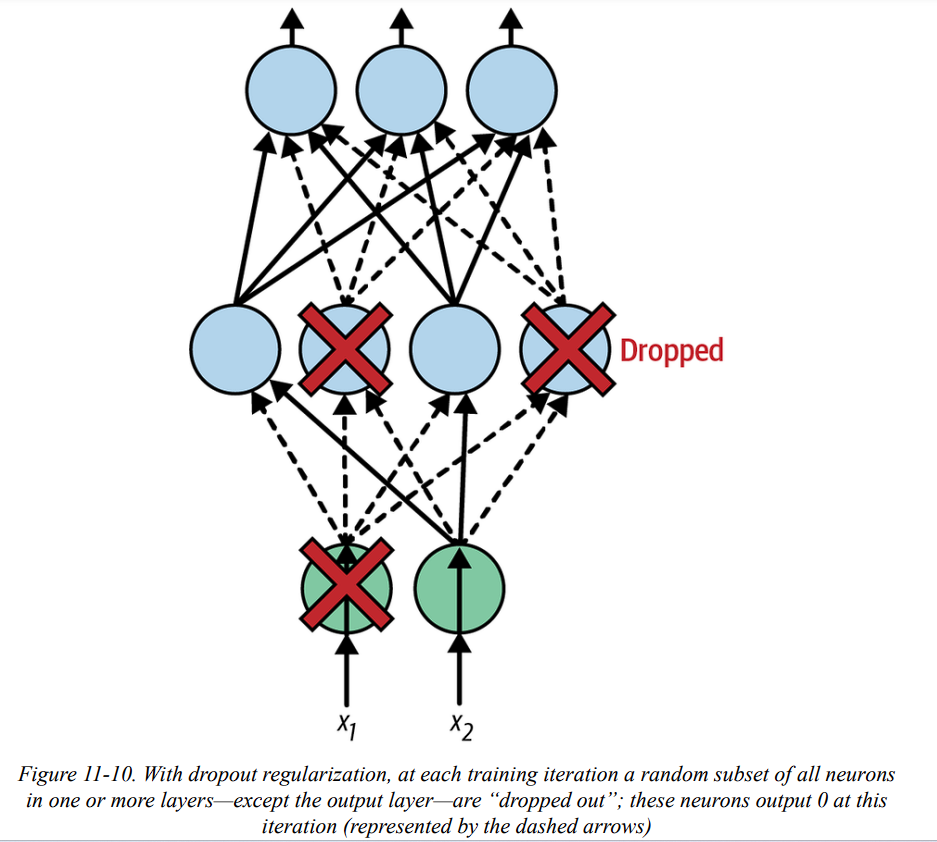

*  Since each neuron can be
either present or absent, there are a total of 2 possible networks (where N
is the total number of droppable neurons). This is such a huge number that
it is virtually impossible for the same neural network to be sampled twice.  The resulting
neural network can be seen as an averaging ensemble of all these smaller
neural networks.

> TIP
In practice, you can usually apply dropout only to the neurons in the top one to three
layers (excluding the output layer).

* There is one small but important technical detail. Suppose p = 75%: on
average only 25% of all neurons are active at each step during training. This
means that after training, a neuron would be connected to four times as
many input neurons as it would be during training. To compensate for this
fact, we need to multiply each neuron’s input connection weights by four
during training. If we don’t, the neural network will not perform well as it
will see different data during and after training. More generally, we need to
divide the connection weights by the keep probability (1 – p) during
training.


In [114]:
tf.random.set_seed(42)

In [118]:
"""To implement dropout using Keras, you can use the
tf.keras.layers.Dropout layer. During training, it randomly drops some
inputs (setting them to 0) and divides the remaining inputs by the keep
probability. After training, it does nothing at all; it just passes the inputs to
the next layer. The following code applies dropout regularization before
every dense layer, using a dropout rate of 0.2:"""

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history  = model.fit(X_train,y_train,epochs=10,
                     validation_data=(X_valid,y_valid))

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6850 - loss: 0.8615 - val_accuracy: 0.8326 - val_loss: 0.4422
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8099 - loss: 0.5266 - val_accuracy: 0.8502 - val_loss: 0.3974
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8229 - loss: 0.4858 - val_accuracy: 0.8516 - val_loss: 0.3913
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8328 - loss: 0.4590 - val_accuracy: 0.8584 - val_loss: 0.3741
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8390 - loss: 0.4392 - val_accuracy: 0.8678 - val_loss: 0.3643
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8448 - loss: 0.4302 - val_accuracy: 0.8558 - val_loss: 0.3703
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8435 - loss: 0.4221 - val_accuracy: 0.8560 - val_loss: 0.3639
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8492 - loss: 0.4108 - 

>WARNING
Since dropout is only active during training, comparing the training loss and the
validation loss can be misleading. In particular, a model may be overfitting the training
set and yet have similar training and validation losses. So, make sure to evaluate the
training loss without dropout (e.g., after training).

* If you observe that the model is overfitting, you can increase the dropout
rate. Conversely, you should try decreasing the dropout rate if the model
underfits the training set. It can also help to increase the dropout rate for
large layers, and reduce it for small ones. Moreover, many state-of-the-art
architectures only use dropout after the last hidden layer, so you may want
to try this if full dropout is too strong.

* Dropout does tend to significantly slow down convergence, but it often
results in a better model when tuned properly. So, it is generally well worth
the extra time and effort, especially for large models.


In [119]:
model.evaluate(X_train,y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8822 - loss: 0.3196


[0.3228479027748108, 0.8801817893981934]

In [120]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8586 - loss: 0.3741


[0.3770398795604706, 0.8571000099182129]

Note: make sure to use AlphaDropout instead of Dropout if you want to build a self-normalizing neural net using SELU.


>TIP
If you want to regularize a self-normalizing network based on the SELU activation
function (as discussed earlier), you should use alpha dropout: this is a variant of dropout
that preserves the mean and standard deviation of its inputs. It was introduced in the
same paper as SELU, as regular dropout would break self-normalization.


3. Monte Carlo (MC) Dropout:

* MC
dropout, which can boost the performance of any trained dropout
model without having to retrain it or even modify it at all. It also
provides a much better measure of the model’s uncertainty.

In [121]:
tf.random.set_seed(42)

In [122]:
import numpy as np
y_probas = np.stack([model(X_test, training=True)
for sample in range(100)])
y_proba = y_probas.mean(axis=0)

* Note that model(X) is similar to model.predict(X) except it returns a
tensor rather than a NumPy array, and it supports the training argument.
In this code example, setting training=True ensures that the Dropout
layer remains active, so all predictions will be a bit different. We just make
100 predictions over the test set, and we compute their average.

* Averaging over multiple predictions with dropout turned on
gives us a Monte Carlo estimate that is generally more reliable than the
result of a single prediction with dropout turned off.


In [123]:
"""For example, let’s look
at the model’s prediction for the first instance in the Fashion MNIST test
set, with dropout turned off"""

model.predict(X_test[:1]).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.053, 0.   , 0.084, 0.   ,
        0.863]], dtype=float32)

* MC dropout tends to improve the reliability of the model’s probability
estimates. This means that it’s less likely to be confident but wrong, which
can be dangerous: just imagine a self-driving car confidently ignoring a stop
sign.



In [124]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.12 , 0.   , 0.111, 0.001,
       0.767], dtype=float32)

In [125]:
"""It’s also useful to know exactly which other classes are most likely.
Additionally, you can take a look at the standard deviation of the probability
estimates:
"""
y_std = y_probas.std(axis=0)
y_std[0].round(3)


array([0.001, 0.001, 0.001, 0.   , 0.   , 0.141, 0.001, 0.11 , 0.004,
       0.181], dtype=float32)

* Apparently there’s quite a lot of variance in the probability estimates for
class 9: the standard deviation is 0.183, which should be compared to the
estimated probability of 0.723: if you were building a risk-sensitive system
(e.g., a medical or financial system), you would probably treat such an
uncertain prediction with extreme caution. You would definitely not treat it
like an 84.4% confident prediction. The model’s accuracy also got a (very)
small boost from 87.0% to 87.2%:


In [126]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

0.8603

>NOTE
The number of Monte Carlo samples you use (100 in this example) is a hyperparameter
you can tweak. The higher it is, the more accurate the predictions and their uncertainty
estimates will be. However, if you double it, inference time will also be doubled.
Moreover, above a certain number of samples, you will notice little improvement. Your
job is to find the right trade-off between latency and accuracy, depending on your
application.



In [127]:
"""If your model contains other layers that behave in a special way during
training (such as BatchNormalization layers), then you should not force
training mode like we just did. Instead, you should replace the Dropout
layers with the following MCDropout class"""
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)



In [128]:
# extra code – shows how to convert Dropout to MCDropout in a Sequential model
Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer, Dropout) else layer
    for layer in model.layers
])
mc_model.set_weights(model.get_weights())

In [129]:
mc_model.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_34 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout (MCDropout)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_1 (MCDropout)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_2 (MCDropout)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [130]:
# extra code – shows that the model works without retraining
tf.random.set_seed(42)
np.mean([mc_model.predict(X_test[:1])
         for sample in range(100)], axis=0).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.12, 0.  , 0.73]],
      dtype=float32)

* we just subclass the Dropout layer and override the call() method
to force its training argument to True (see Chapter 12). Similarly, you
could define an MCAlphaDropout class by subclassing AlphaDropout
instead. If you are creating a model from scratch, it’s just a matter of using
MCDropout rather than Dropout. But if you have a model that was already
trained using Dropout, you need to create a new model that’s identical to
the existing model except with Dropout instead of MCDropout, then copy
the existing model’s weights to your new model.

* MC dropout is a great technique that boosts dropout models and
provides better uncertainty estimates. And of course, since it is just regular
dropout during training, it also acts like a regularizer

4. Max-Norm Regularization:
* for each neuron, it constrains the weights w of the
    30
    incoming connections such that ∥ w ∥_2 ≤ r, where r is the max-norm
    hyperparameter and ∥ · ∥_2 is the ℓ2 norm

* Max-norm regularization does not add a regularization loss term to the
overall loss function. Instead, it is typically implemented by computing
∥ w ∥ after each training step and rescaling w if needed (w ← w r /
∥ w ∥ ).

* Reducing r increases the amount of regularization and helps reduce
overfitting. Max-norm regularization can also help alleviate the unstable
gradients problems (if you are not using batch normalization).

* After each training iteration, the model’s fit() method will call the object
returned by max_norm(), passing it the layer’s weights and getting rescaled
weights in return, which then replace the layer’s weights.

* The max_norm() function has an axis argument that defaults to 0. A Dense
layer usually has weights of shape [number of inputs, number of neurons],
so using axis=0 means that the max-norm constraint will apply
independently to each neuron’s weight vector.

* . If you want to use max-norm
with convolutional layers (see Chapter 14), make sure to set the
max_norm() constraint’s axis argument appropriately (usually axis=[0,
1, 2]).

In [131]:
"""To implement max-norm regularization in Keras, set the
kernel_constraint argument of each hidden layer to a max_norm()
constraint with the appropriate max value, like this:"""

dense = tf.keras.layers.Dense(
    100, activation="relu", kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.))

In [133]:
MaxNormDense = partial(tf.keras.layers.Dense,
                       activation="relu",kernel_initializer="he_normal",
                       kernel_constraint=tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10,activation="softmax")
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

history = model.fit(X_train,y_train,epochs=10,
                    validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7412 - loss: 0.7314 - val_accuracy: 0.8388 - val_loss: 0.4271
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8444 - loss: 0.4258 - val_accuracy: 0.8342 - val_loss: 0.4231
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8580 - loss: 0.3879 - val_accuracy: 0.8420 - val_loss: 0.4122
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8666 - loss: 0.3642 - val_accuracy: 0.8388 - val_loss: 0.4054
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8705 - loss: 0.3501 - val_accuracy: 0.8428 - val_loss: 0.4072
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8747 - loss: 0.3380 - val_accuracy: 0.8382 - val_loss: 0.4123
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8755 - loss: 0.3344 - val_accuracy: 0.8408 - val_loss: 0.4075
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8779 - loss: 0.3288 - 

### Summary and Practical Guidelines

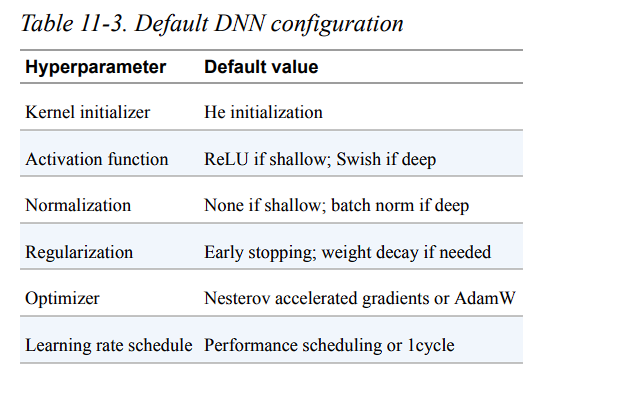

* If the network is a simple stack of dense layers, then it can self-normalize,
and you should use the configuration in Table 11-4 instead:

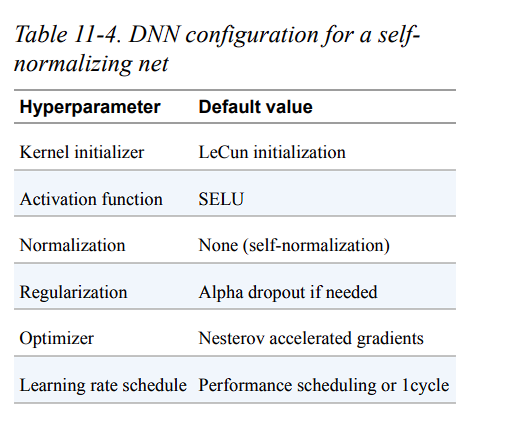
